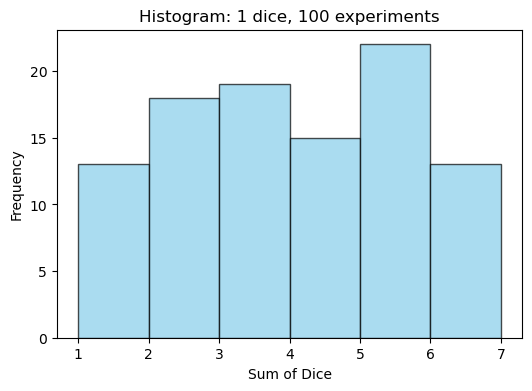

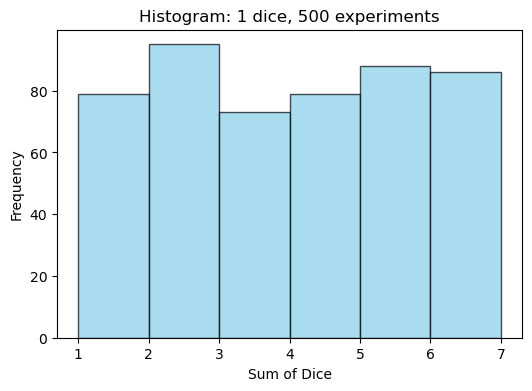

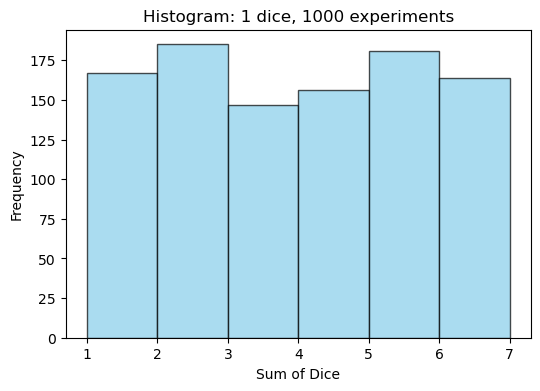

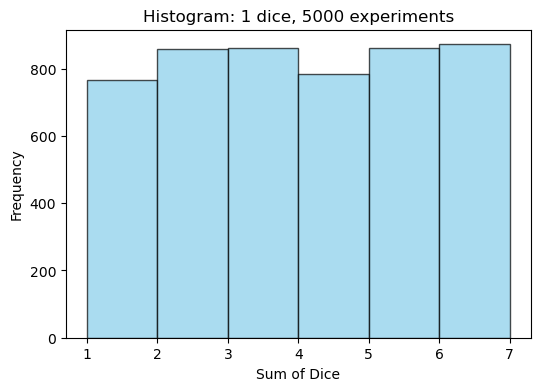

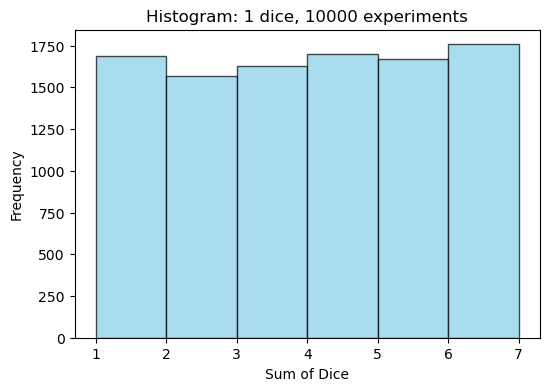

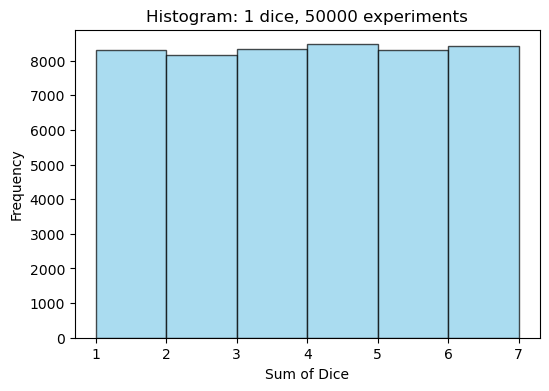

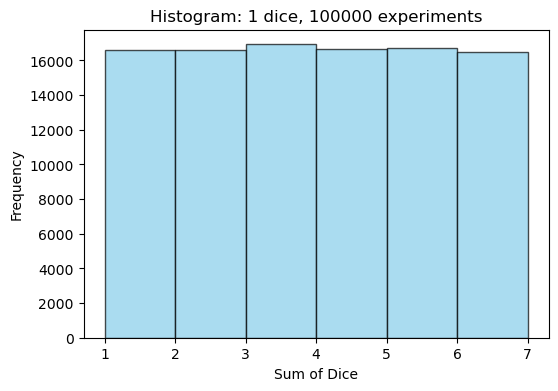

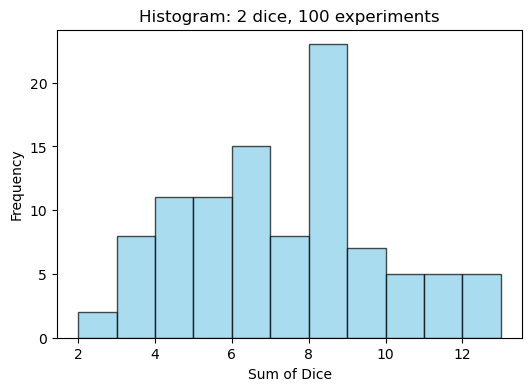

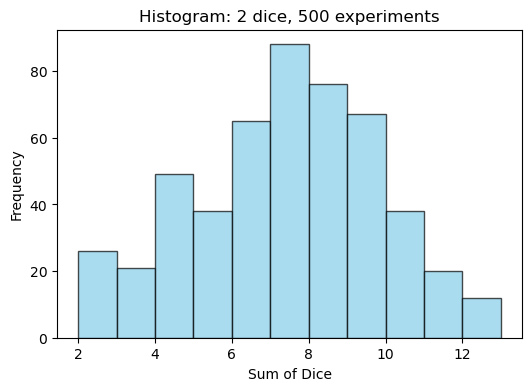

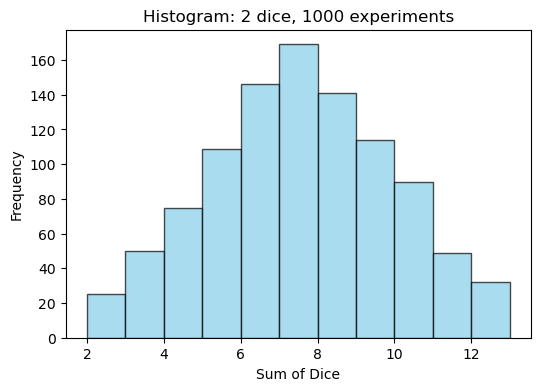

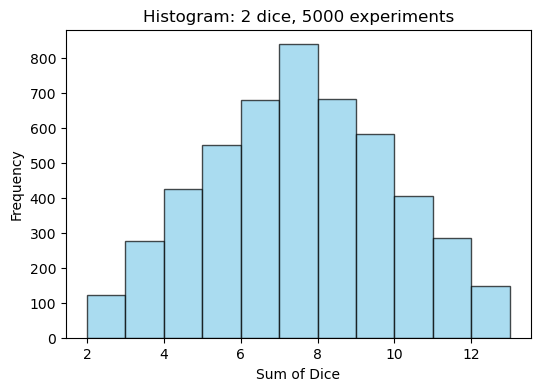

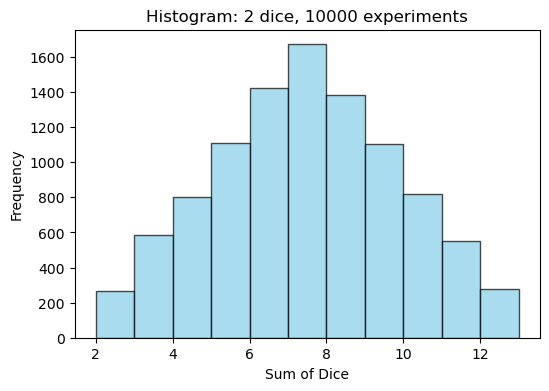

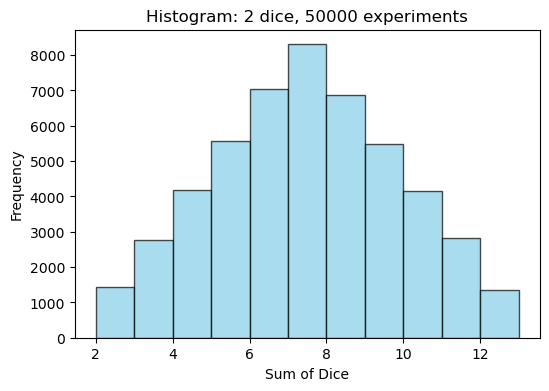

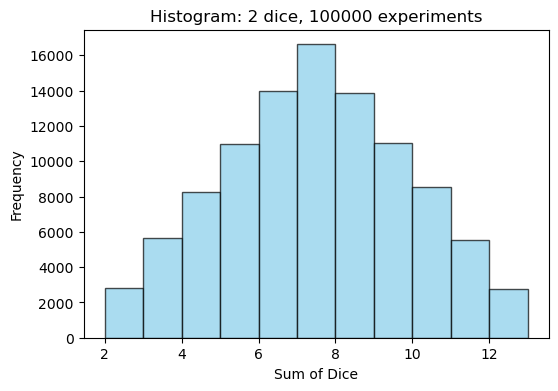

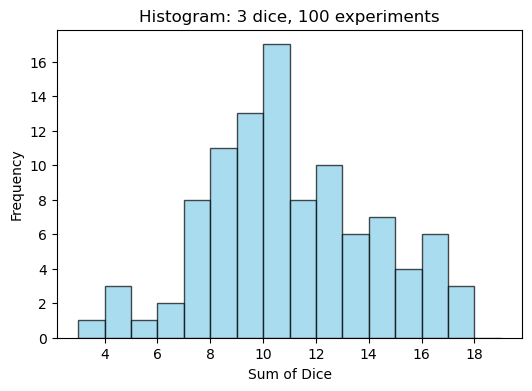

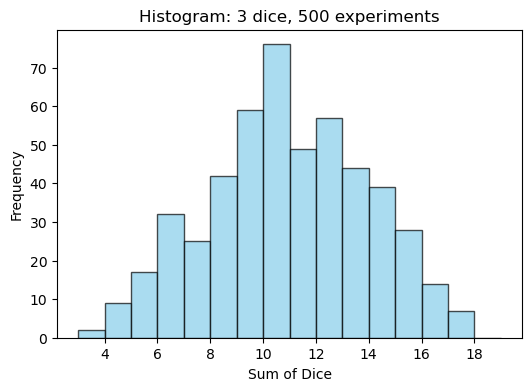

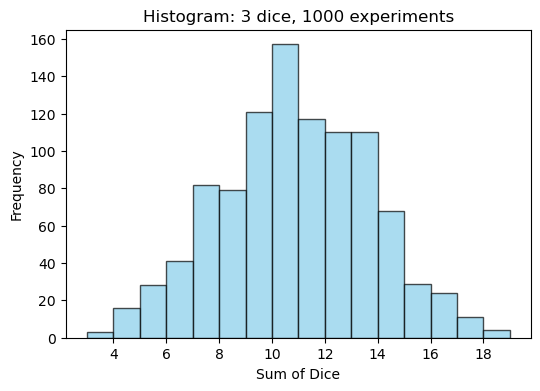

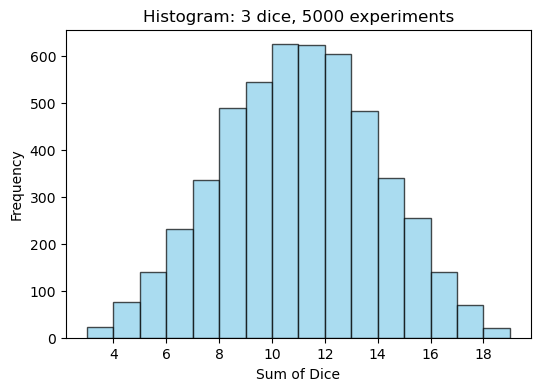

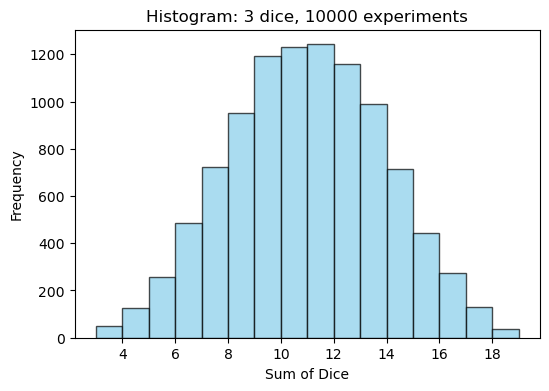

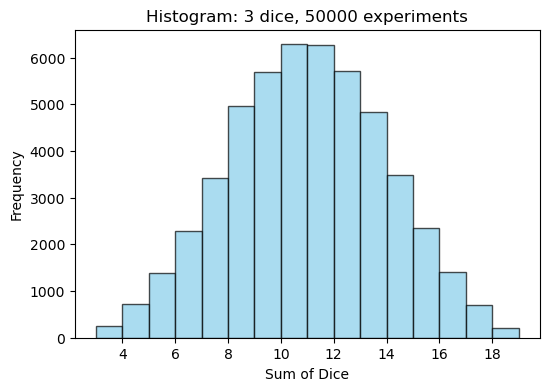

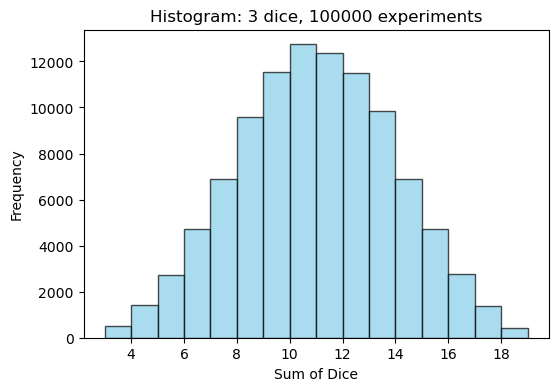

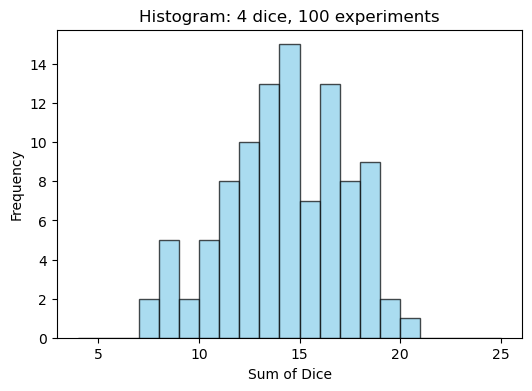

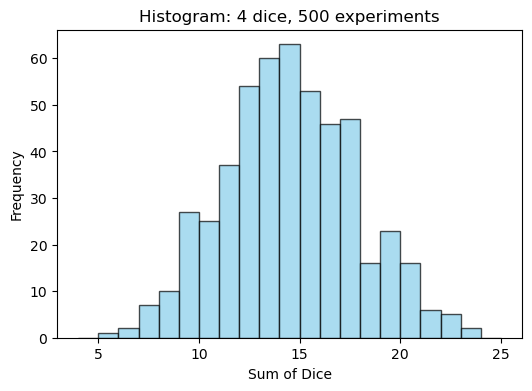

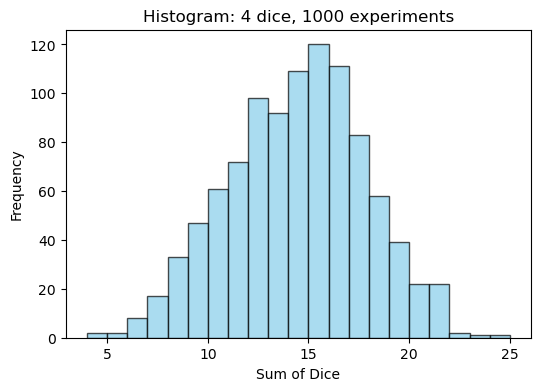

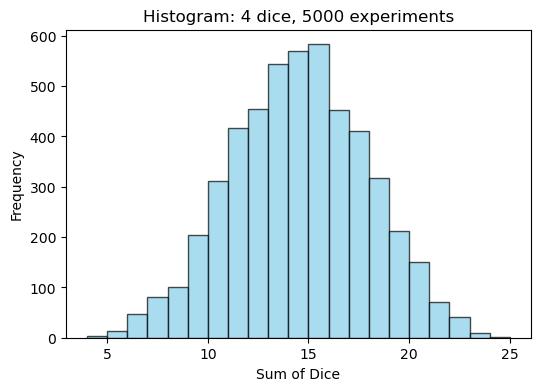

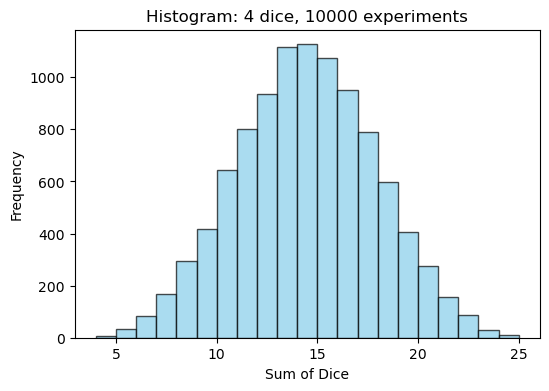

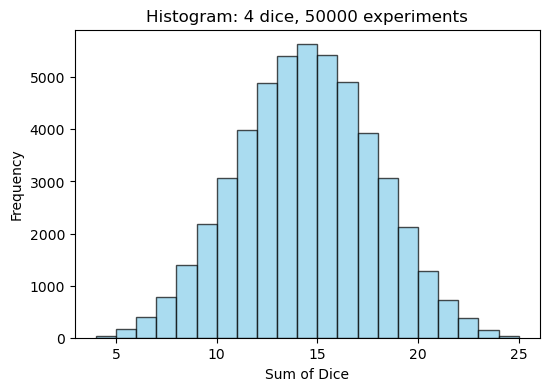

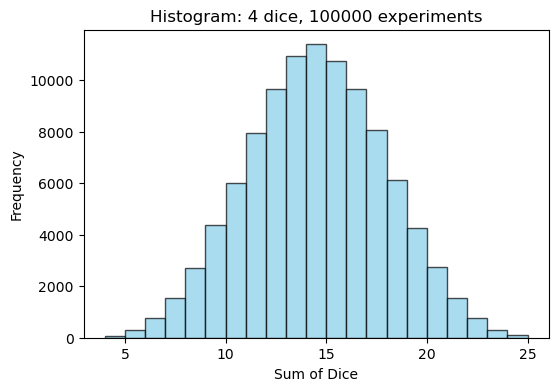

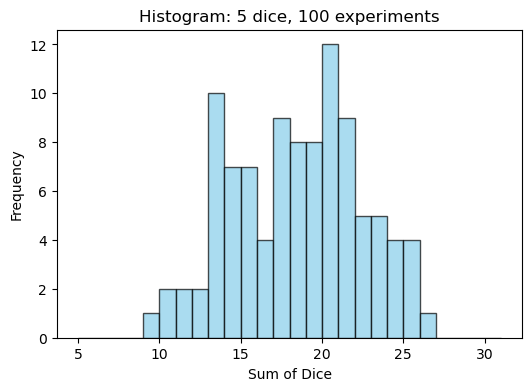

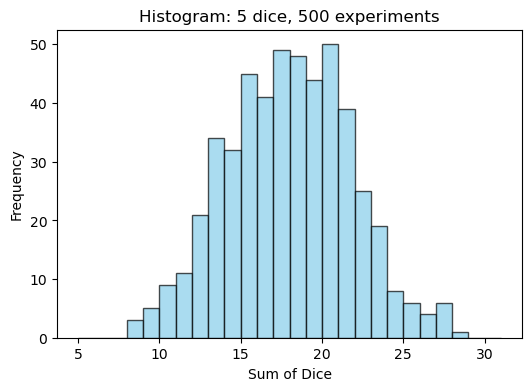

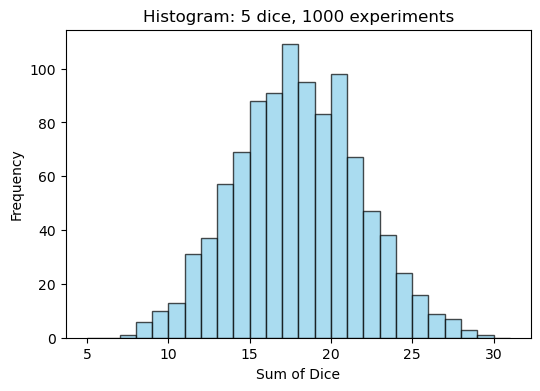

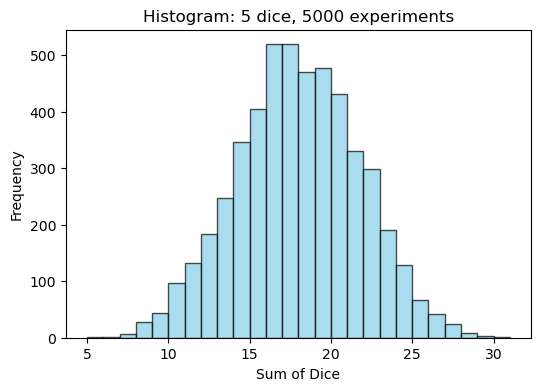

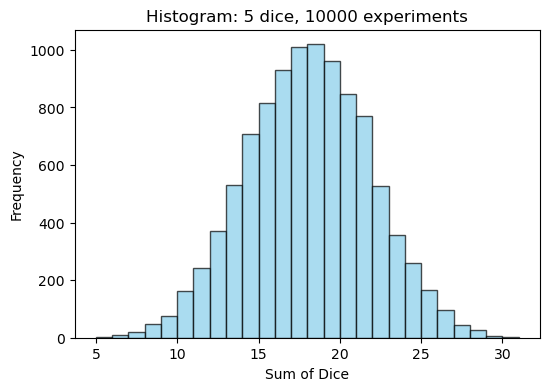

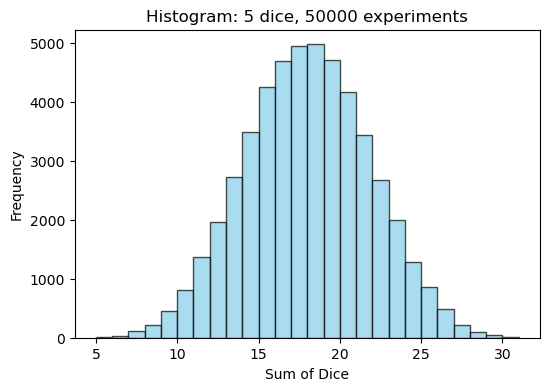

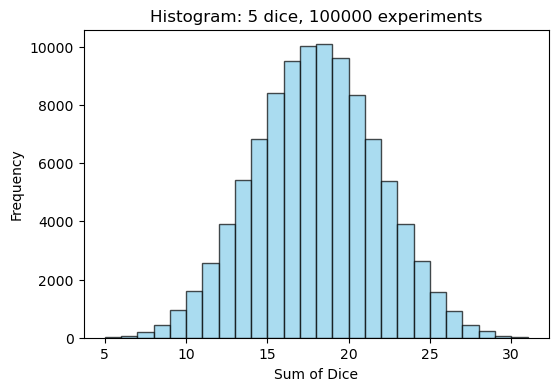

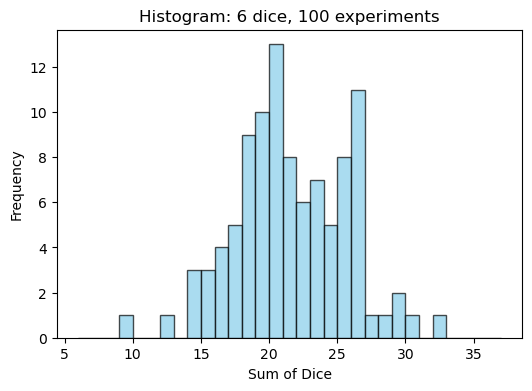

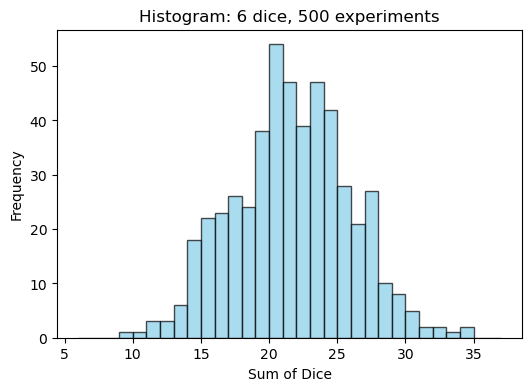

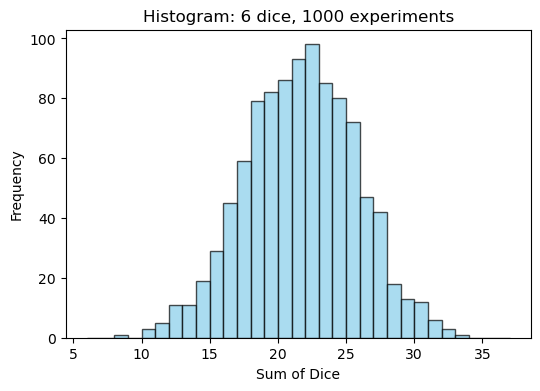

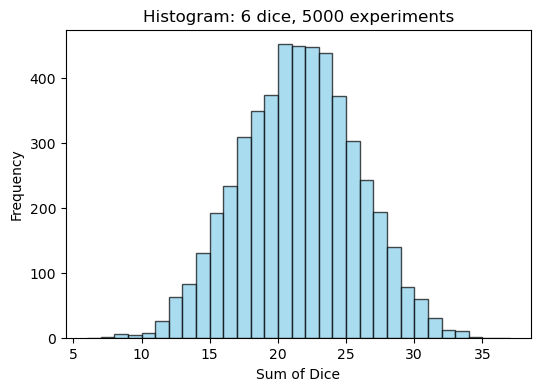

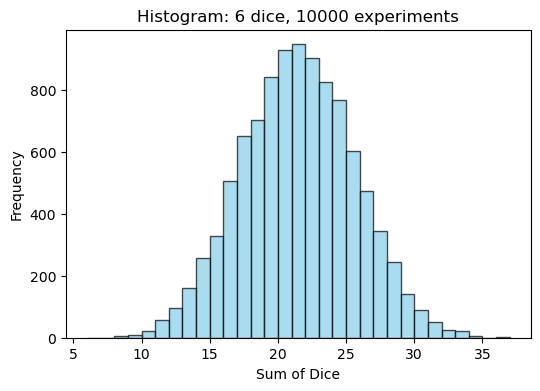

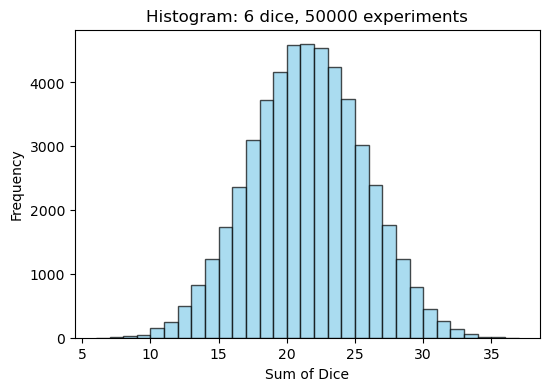

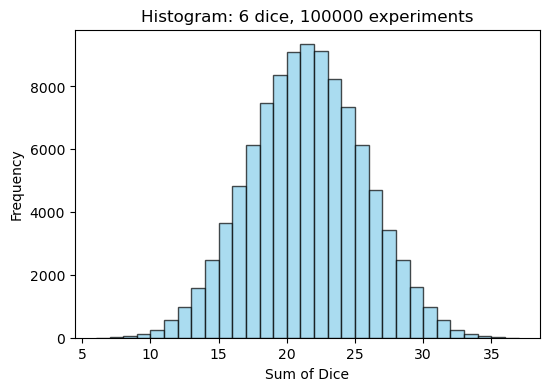


Dice Rolled: 1
  Experiments=100: Mean=3.54, Variance=2.61, Median=3.50
  Experiments=500: Mean=3.52, Variance=2.96, Median=4.00
  Experiments=1000: Mean=3.49, Variance=2.97, Median=4.00
  Experiments=5000: Mean=3.55, Variance=2.90, Median=4.00
  Experiments=10000: Mean=3.54, Variance=2.96, Median=4.00
  Experiments=50000: Mean=3.51, Variance=2.92, Median=4.00
  Experiments=100000: Mean=3.50, Variance=2.90, Median=3.00

Dice Rolled: 2
  Experiments=100: Mean=6.85, Variance=6.35, Median=7.00
  Experiments=500: Mean=6.92, Variance=5.89, Median=7.00
  Experiments=1000: Mean=7.08, Variance=5.67, Median=7.00
  Experiments=5000: Mean=7.04, Variance=5.82, Median=7.00
  Experiments=10000: Mean=6.99, Variance=5.81, Median=7.00
  Experiments=50000: Mean=6.99, Variance=5.85, Median=7.00
  Experiments=100000: Mean=7.00, Variance=5.85, Median=7.00

Dice Rolled: 3
  Experiments=100: Mean=10.54, Variance=9.91, Median=10.00
  Experiments=500: Mean=10.45, Variance=9.11, Median=10.00
  Experiments=1000

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Experiment settings
num_rolls_list = [1, 2, 3, 4, 5, 6]       # dice rolled
num_experiments = [100, 500, 1000, 5000, 10000, 50000, 100000]

dice_results = {}

for rolls in num_rolls_list:
    dice_results[rolls] = {}
    for n in num_experiments:
        sums = [np.sum(np.random.randint(1, 7, rolls)) for _ in range(n)]
        mean_val = np.mean(sums)
        var_val = np.var(sums)
        median_val = np.median(sums)
        dice_results[rolls][n] = (mean_val, var_val, median_val)
        
        # Histogram
        plt.figure(figsize=(6,4))
        plt.hist(sums, bins=range(rolls, 6*rolls+2), alpha=0.7, color='skyblue', edgecolor='black')
        plt.title(f'Histogram: {rolls} dice, {n} experiments')
        plt.xlabel("Sum of Dice")
        plt.ylabel("Frequency")
        plt.show()

# Report
for rolls in dice_results:
    print(f"\nDice Rolled: {rolls}")
    for n in dice_results[rolls]:
        mean, var, median = dice_results[rolls][n]
        print(f"  Experiments={n}: Mean={mean:.2f}, Variance={var:.2f}, Median={median:.2f}")


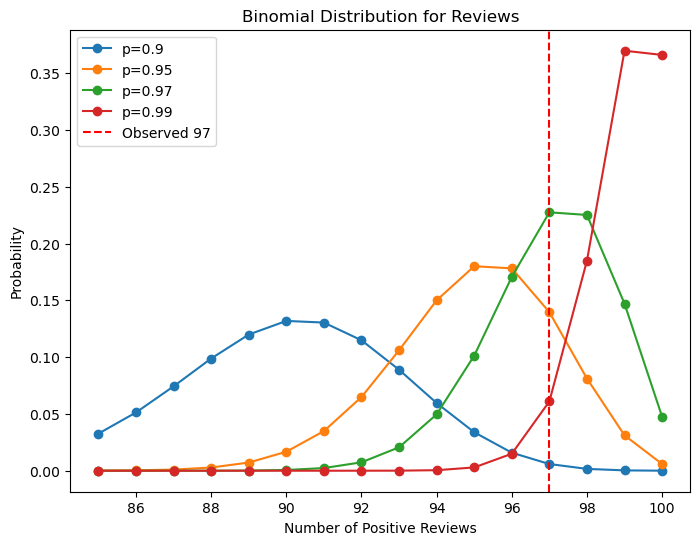

Estimated Success Rate (MLE): 0.97
Mean: 97.00, Variance: 2.91, Median: ~97.0


In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

n = 100   # total reviews
k = 97    # positives

# Try different probabilities
p_values = [0.9, 0.95, 0.97, 0.99]

plt.figure(figsize=(8,6))
for p in p_values:
    rv = stats.binom(n, p)
    x = np.arange(85, 101)
    plt.plot(x, rv.pmf(x), marker='o', label=f'p={p}')

plt.axvline(k, color='red', linestyle='--', label='Observed 97')
plt.title("Binomial Distribution for Reviews")
plt.xlabel("Number of Positive Reviews")
plt.ylabel("Probability")
plt.legend()
plt.show()

# MLE for success rate
p_hat = k/n
print(f"Estimated Success Rate (MLE): {p_hat:.2f}")
print(f"Mean: {n*p_hat:.2f}, Variance: {n*p_hat*(1-p_hat):.2f}, Median: ~{np.floor(n*p_hat)}")


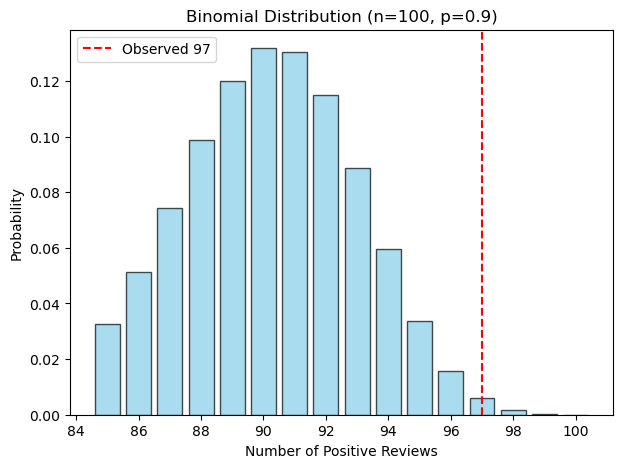

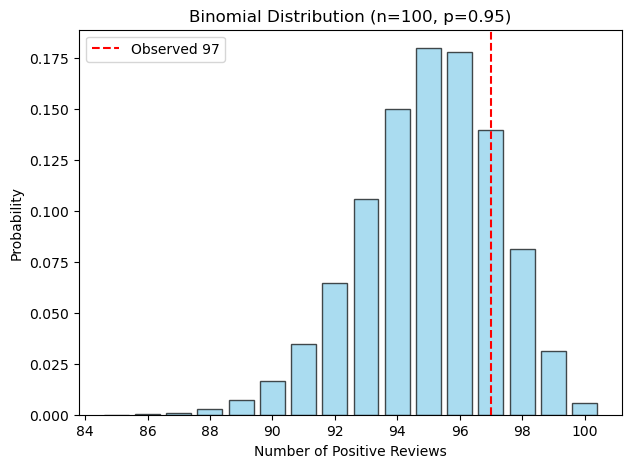

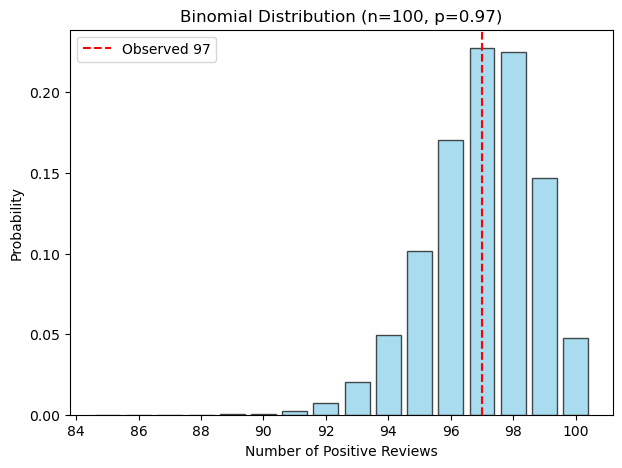

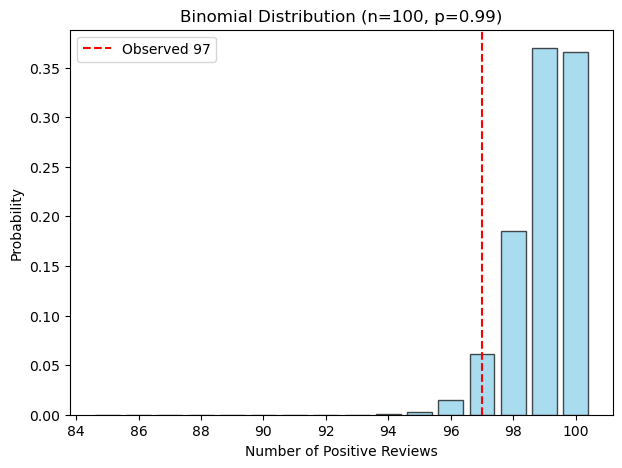


Binomial Distribution Results (97 positives out of 100):
p=0.9: Mean=90.00, Variance=9.00, Median≈90.0
p=0.95: Mean=95.00, Variance=4.75, Median≈95.0
p=0.97: Mean=97.00, Variance=2.91, Median≈97.0
p=0.99: Mean=99.00, Variance=0.99, Median≈99.0

Estimated Success Rate (MLE): 0.97


In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

n = 100   # total reviews
k = 97    # positives
p_values = [0.9, 0.95, 0.97, 0.99]

binom_results = {}

for p in p_values:
    rv = stats.binom(n, p)
    x = np.arange(85, 101)
    y = rv.pmf(x)
    
    # Save stats
    mean_val = n * p
    var_val = n * p * (1 - p)
    median_val = np.floor(n * p)
    binom_results[p] = (mean_val, var_val, median_val)
    
    # Plot histogram for each p
    plt.figure(figsize=(7,5))
    plt.bar(x, y, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(k, color='red', linestyle='--', label=f'Observed 97')
    plt.title(f"Binomial Distribution (n={n}, p={p})")
    plt.xlabel("Number of Positive Reviews")
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

# Report stats
print("\nBinomial Distribution Results (97 positives out of 100):")
for p in binom_results:
    mean_val, var_val, median_val = binom_results[p]
    print(f"p={p}: Mean={mean_val:.2f}, Variance={var_val:.2f}, Median≈{median_val}")
    
# MLE estimate
p_hat = k/n
print(f"\nEstimated Success Rate (MLE): {p_hat:.2f}")


In [3]:
import pandas as pd
from scipy.stats import entropy
import numpy as np

# Load datasets
advertising = pd.read_csv("advertising.csv")
faa_ai_prelim = pd.read_csv("faa_ai_prelim.csv")
housing = pd.read_csv("Housing.csv")

def compute_entropy(series, bins=10):
    if series.dtype == 'object':  # categorical
        counts = series.value_counts(normalize=True)
    else:  # continuous → binning
        counts, _ = np.histogram(series.dropna(), bins=bins, density=True)
        counts = counts / counts.sum()
    return entropy(counts, base=2)

datasets = {
    "Advertising": advertising,
    "FAA": faa_ai_prelim,
    "Housing": housing
}

entropy_results = {}

for name, df in datasets.items():
    entropy_results[name] = {}
    print(f"\nEntropy values for {name} dataset:")
    for col in df.columns:
        try:
            h = compute_entropy(df[col])
            entropy_results[name][col] = h
            print(f"  {col}: {h:.4f}")
        except:
            print(f"  {col}: skipped")



Entropy values for Advertising dataset:
  TV: 3.2985
  Radio: 3.2896
  Newspaper: 2.7522
  Sales: 3.0530

Entropy values for FAA dataset:
  UPDATED: 0.2243
  ENTRY_DATE: 2.7897
  EVENT_LCL_DATE: 3.8502
  EVENT_LCL_TIME: 6.1973
  LOC_CITY_NAME: 6.2787
  LOC_STATE_NAME: 4.3330
  LOC_CNTRY_NAME: 0.0000
  RMK_TEXT: 6.3268
  EVENT_TYPE_DESC: 0.9101
  FSDO_DESC: 5.2054
  REGIST_NBR: 6.3750
  FLT_NBR: 2.5850
  ACFT_OPRTR: 2.5216
  ACFT_MAKE_NAME: 3.8938
  ACFT_MODEL_NAME: 5.5629
  ACFT_MISSING_FLAG: nan
  ACFT_DMG_DESC: 1.8199
  FLT_ACTIVITY: 2.0382
  FLT_PHASE: 1.8600
  FAR_PART: 0.0000
  MAX_INJ_LVL: 1.8474
  FATAL_FLAG: 0.0000
  FLT_CRW_INJ_NONE: 0.6985
  FLT_CRW_INJ_MINOR: 0.9183
  FLT_CRW_INJ_SERIOUS: 0.0000
  FLT_CRW_INJ_FATAL: 1.0000
  FLT_CRW_INJ_UNK: nan
  CBN_CRW_INJ_NONE: nan
  CBN_CRW_INJ_MINOR: nan
  CBN_CRW_INJ_SERIOUS: nan
  CBN_CRW_INJ_FATAL: nan
  CBN_CRW_INJ_UNK: 0.0000
  PAX_INJ_NONE: 1.5197
  PAX_INJ_MINOR: 0.0000
  PAX_INJ_SERIOUS: 0.0000
  PAX_INJ_FATAL: 0.0000
  PAX_IN

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


In [4]:
print("\n========== FINAL REPORT ==========")

# Dice Roll Report
print("\n--- Dice Roll Experiment ---")
for rolls in dice_results:
    print(f"Dice Rolled: {rolls}")
    for n in dice_results[rolls]:
        mean, var, median = dice_results[rolls][n]
        print(f"  Experiments={n}: Mean={mean:.2f}, Variance={var:.2f}, Median={median:.2f}")

# Binomial Report
print("\n--- Binomial Distribution (97/100 Reviews) ---")
print(f"Estimated Success Rate (MLE): {p_hat:.2f}")
print(f"Mean: {n*p_hat:.2f}, Variance: {n*p_hat*(1-p_hat):.2f}, Median: ~{np.floor(n*p_hat)}")

# Entropy Report
print("\n--- Entropy of Datasets ---")
for name, result in entropy_results.items():
    print(f"\n{name} dataset:")
    for col, h in result.items():
        print(f"  {col}: {h:.4f}")



========== FINAL REPORT ==========

--- Dice Roll Experiment ---
Dice Rolled: 1
  Experiments=100: Mean=3.54, Variance=2.61, Median=3.50
  Experiments=500: Mean=3.52, Variance=2.96, Median=4.00
  Experiments=1000: Mean=3.49, Variance=2.97, Median=4.00
  Experiments=5000: Mean=3.55, Variance=2.90, Median=4.00
  Experiments=10000: Mean=3.54, Variance=2.96, Median=4.00
  Experiments=50000: Mean=3.51, Variance=2.92, Median=4.00
  Experiments=100000: Mean=3.50, Variance=2.90, Median=3.00
Dice Rolled: 2
  Experiments=100: Mean=6.85, Variance=6.35, Median=7.00
  Experiments=500: Mean=6.92, Variance=5.89, Median=7.00
  Experiments=1000: Mean=7.08, Variance=5.67, Median=7.00
  Experiments=5000: Mean=7.04, Variance=5.82, Median=7.00
  Experiments=10000: Mean=6.99, Variance=5.81, Median=7.00
  Experiments=50000: Mean=6.99, Variance=5.85, Median=7.00
  Experiments=100000: Mean=7.00, Variance=5.85, Median=7.00
Dice Rolled: 3
  Experiments=100: Mean=10.54, Variance=9.91, Median=10.00
  Experiments=